# UAV Placement Optimization Example

This notebook demonstrates how to use the `uav_placement` package to optimize UAV base station placement. The parameters in this example mirror those used in experiment_2007 from the MATLAB implementation:

- **7 base stations** with powers [7, 9, 9, 9, 10, 10, 12] dBm
- **200 mobile users** in a 7×7 km region
- **Sigmoid utility function** with stochastic gradient descent
- **50 optimization iterations** with random seed 0

In [1]:
# Import required libraries
from uav_placement import UAVPlacementOptimizer

In [2]:
# Create optimizer
optimizer = UAVPlacementOptimizer()

Running optimization...
Running stochastic optimization with 7 BSs and 196 MUs...
Starting optimization with 7 BSs and 196 MUs for 100 steps
Step 0: Avg utility = 0.3488, Step norm = 9.8874e-02 km
Step 10: Avg utility = 0.7118, Step norm = 6.9726e-02 km
Step 20: Avg utility = 0.8146, Step norm = 3.4400e-02 km
Step 30: Avg utility = 0.8554, Step norm = 5.7429e-02 km
Step 40: Avg utility = 0.9346, Step norm = 3.9876e-02 km
Step 50: Avg utility = 0.9551, Step norm = 1.7466e-02 km
Step 60: Avg utility = 0.9675, Step norm = 1.4245e-02 km
Step 70: Avg utility = 0.9767, Step norm = 1.6837e-02 km
Step 80: Avg utility = 0.9849, Step norm = 1.3069e-02 km
Step 90: Avg utility = 0.9886, Step norm = 7.6069e-03 km
Computing power distribution heatmap...


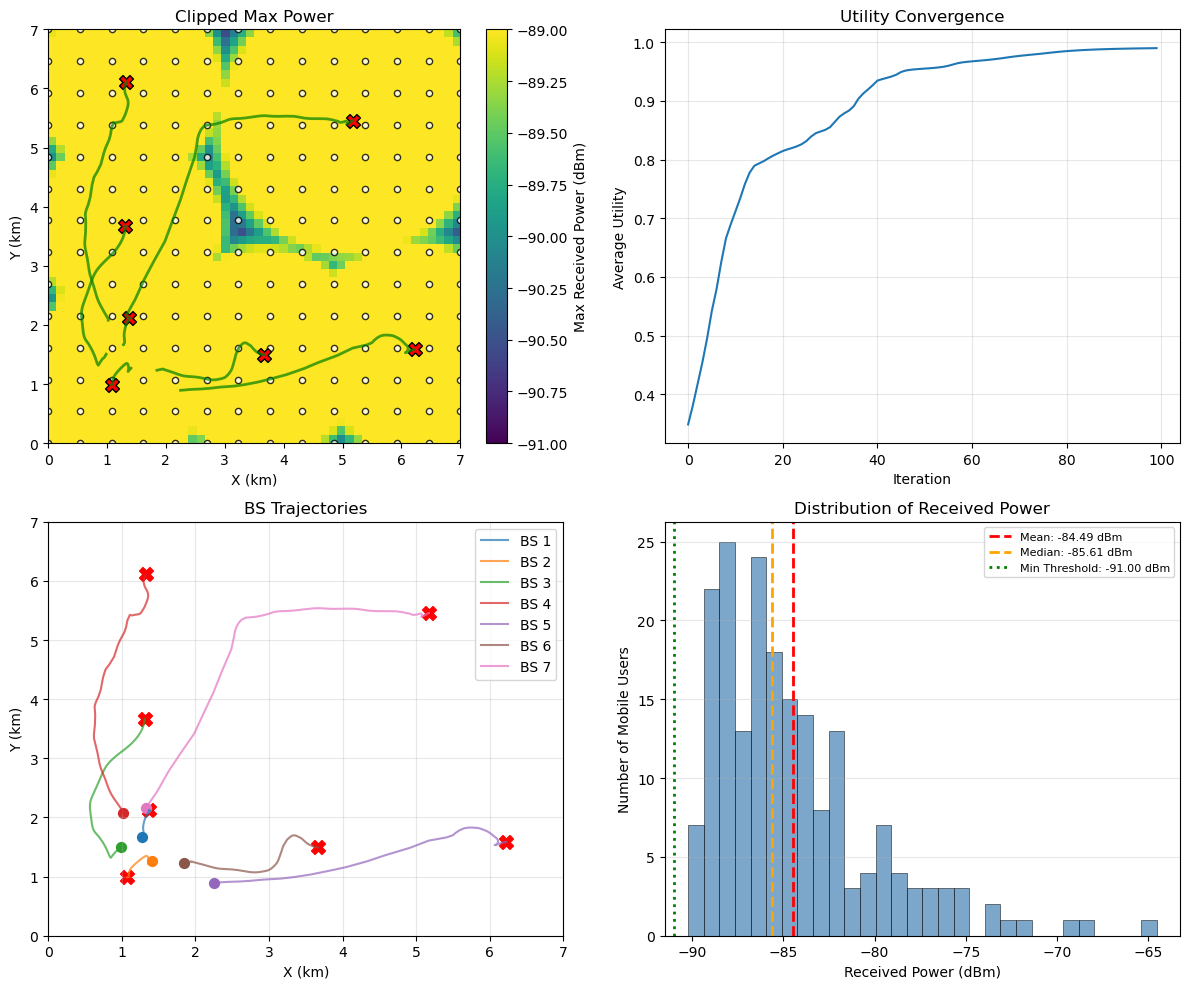

In [3]:
# Run optimization with custom parameters (mirrors experiment_2007)
print("Running optimization...")
results = optimizer.optimize(
    num_base_stations=7,
    num_mobile_users=196,
    region_size=7.0,
    bs_powers_dbm=[7, 9, 9, 9, 10, 10, 12],  # Power levels from experiment_2007
    num_iterations=100,  # More iterations to see convergence
    optimization_method='stochastic',
    utility_function='sigmoid',
    user_distribution='even',  # 'random' or 'even'
    step_size=1e-12,  # Small step size to handle large gradients
    random_seed=0  # For reproducibility (matches rng(0) in MATLAB)
)
# optimizer.save_results('optimization_results.json')
fig = optimizer.plot_results(save_path=None)

Comparing with k-means optimization...
Running kmeans optimization with 7 BSs and 196 MUs...
Starting optimization with 7 BSs and 196 MUs for 50 steps
Step 0: Avg utility = 0.2616, Step norm = 9.5812e-01 km
Step 5: Avg utility = 0.9117, Step norm = 2.5069e-01 km
Step 10: Avg utility = 0.9755, Step norm = 8.4232e-02 km
Step 15: Avg utility = 0.9780, Step norm = 0.0000e+00 km
Step 20: Avg utility = 0.9780, Step norm = 0.0000e+00 km
Step 25: Avg utility = 0.9780, Step norm = 0.0000e+00 km
Step 30: Avg utility = 0.9780, Step norm = 0.0000e+00 km
Step 35: Avg utility = 0.9780, Step norm = 0.0000e+00 km
Step 40: Avg utility = 0.9780, Step norm = 0.0000e+00 km
Step 45: Avg utility = 0.9780, Step norm = 0.0000e+00 km
Computing power distribution heatmap...
Stochastic final utility: 0.9899
K-means final utility: 0.9780


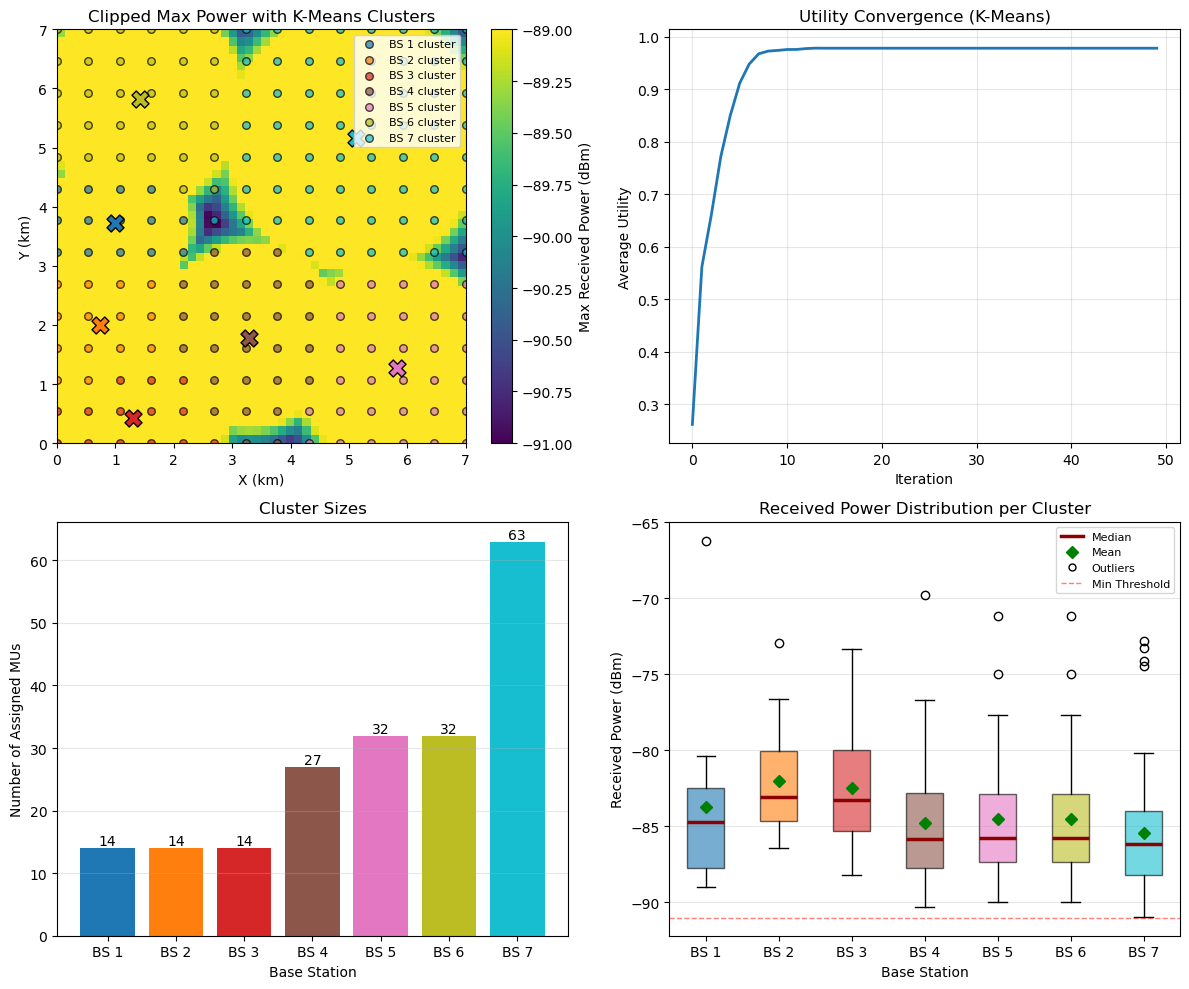

In [4]:
# Quick comparison with k-means
print('Comparing with k-means optimization...')
optimizer_kmeans = UAVPlacementOptimizer()
results_kmeans = optimizer_kmeans.optimize(
    num_base_stations=7,
    num_mobile_users=196,
    region_size=7.0,
    bs_powers_dbm=[7, 9, 9, 9, 10, 10, 12],
    num_iterations=50,
    optimization_method='kmeans',  # Specify k-means!
    user_distribution='even',  # 'random' or 'even'
    random_seed=1
)
fig_kmeans = optimizer_kmeans.plot_results(save_path=None)

# Compare utilities if stochastic results exist
if 'results' in dir():
    print(f"Stochastic final utility: {results['results']['final_utility']:.4f}")
    print(f"K-means final utility: {results_kmeans['results']['final_utility']:.4f}")